In [ ]:
#/* run this once, then reload, and then skip this
!npm install -g --unsafe-perm ijavascript
!ijsinstall --install=global  # as fake comment */

In [3]:
// need this for running shell command
var { spawn } = require('child_process');
var sh = (cmd) => { 
    $$.async();
    var sp = spawn(cmd, { cwd: process.cwd(), stdio: 'pipe', shell: true, encoding: 'utf-8' });
    sp.stdout.on('data', data => console.log(data.toString()));
    sp.stderr.on('data', data => console.error(data.toString()));
    sp.on('close', () => $$.done());
};
sh('npm init -y');

Wrote to /content/package.json:

{
  "name": "content",
  "version": "1.0.0",
  "description": "",
  "main": "index.js",
  "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
  "keywords": [],
  "author": "",
  "license": "ISC"
}





# Asynchronicity

In a **synchronous** programming model, **things happen one at a time**

An **asynchronous** model allows **multiple things to happen at the same time**

Both of the important JavaScript programming platforms—browsers and Node.js—make operations that might take a while asynchronous

<p align='center'>
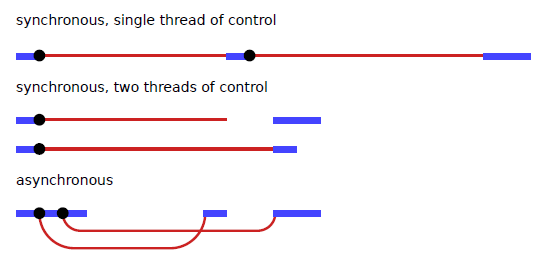
</p>

# Callbacks

One approach to asynchronous programming is to **make functions that perform a slow action take an extra argument, a callback function**

As an example, the **setTimeout function waits a given number of milliseconds**

Waiting is not generally a very important type of work, but it can be useful when doing something like updating an animation or checking whether some thing is taking longer than a given amount of time

In [20]:
setTimeout(() => console.log('Tick'), 500);

Timeout {
  _idleTimeout: 500,
  _idlePrev: [TimersList],
  _idleNext: [TimersList],
  _idleStart: 948598,
  _onTimeout: [Function (anonymous)],
  _timerArgs: undefined,
  _repeat: null,
  _destroyed: false,
  [Symbol(refed)]: true,
  [Symbol(kHasPrimitive)]: false,
  [Symbol(asyncId)]: 84,
  [Symbol(triggerId)]: 81
}

# Promises

Return an object that represents this **future event**

**A promise is an asynchronous action that may complete at some point and produce a value**

The easiest way to create a promise is by calling **Promise.resolve**

To get the result of a promise, you can use its **then** method

In [31]:
let fifteen = Promise.resolve(15);
fifteen.then(value => console.log(`Got ${value}`));

SyntaxError: ignored

To create a promise, you can use as a constructor Promise, the constructor **expects a function as argument**

This is how you’d create a promise-based interface for the readStorage function:

```
function storage(nest, name) {
  return new Promise(resolve => {
    nest.readStorage(name, result => resolve(result));
  });
}

storage(bigOak, 'enemies').then(value => console.log('Got', value));
```



# Failure

# Async Functions

An **async** function is a function that **implicitly returns a promise** and that can, in its body, **await other promises in a way that looks synchronous**

An async function is marked by the word async before the keyword function

Inside an async function, the word **await** can be put in front of an expression to **wait for a promise to resolve and only then continue the execution of the function**

Such a function no longer, like a regular JavaScript function, runs from start to completion in one go. Instead, it **can be frozen at any point that has an await, and can be resumed at a later time**

```
async function findInStorage(nest, name) {
  let local = await storage(nest, name);
  if (local != null) return local;

  let sources = network(nest).filter(n => n != nest.name);
  while (sources.length > 0) {
    let source = sources[Math.floor(Math.random() * sources.length)];
    sources = sources.filter(n => n != source);
    try {
      let found = await routeRequest(nest, source, 'storage', name);
      if (found != null) return found;
    } catch (_) {}
  }
  throw new Error('Not Found');
}
```

